In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

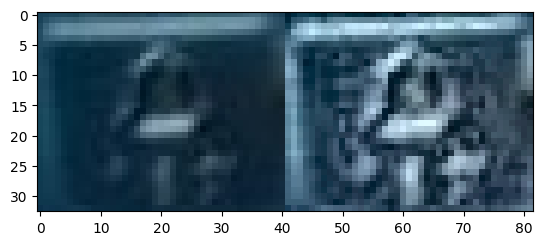

In [49]:
bad1 = "data/labels/train/mixed_95-14.jpg"
bad2 = "data/labels/train/mixed_104-4.jpg"
bad3 = "data/labels/train/mixed_94-10.jpg"
bad4 = "data/labels/train/mixed_31-alarm.jpg"
good1 = "data/labels/train/mixed_91-9.jpg"
good2 = "data/labels/train/mixed_91-door_close.jpg"

img = cv2.imread(bad4)
# INCREASE CONTRAST
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
result = np.hstack((img, enhanced_img))
plt.imshow(result[:, :, ::-1])

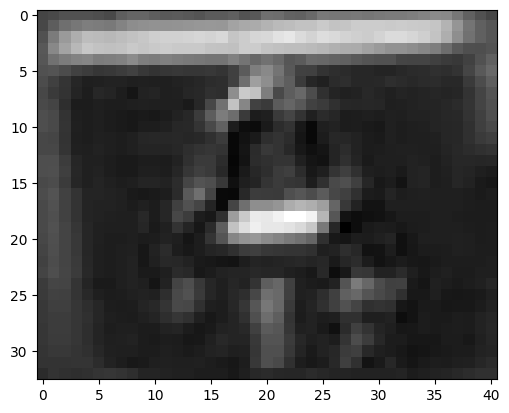

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 0)
plt.imshow(blurred, cmap="gray")

(0.0, 256.0)

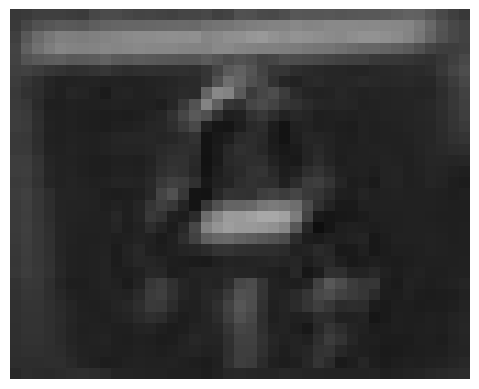

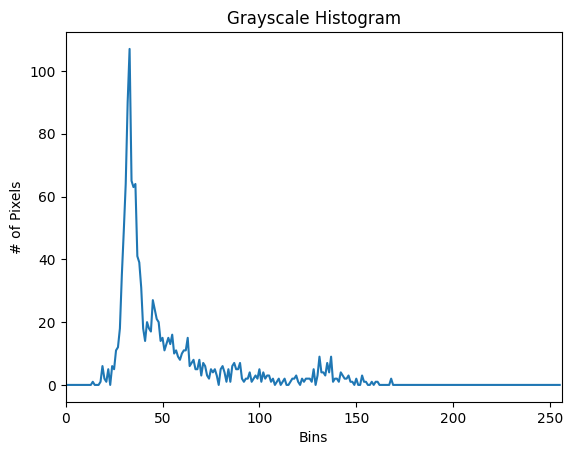

In [51]:
hist = cv2.calcHist([blurred], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB))
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

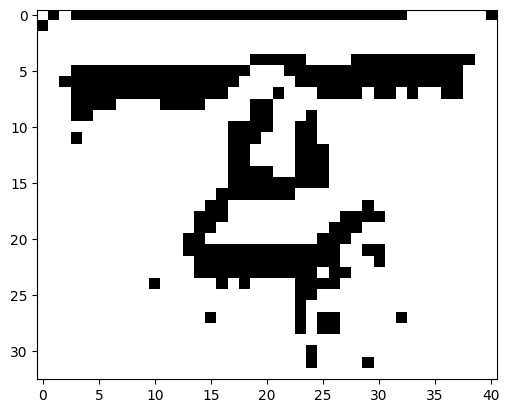

In [56]:
# _, thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 10)
plt.imshow(thresh, cmap="gray")